# To-Do
- Join data tables 
 - Set time intervals to 5 minutes
- Feature engineering
 - Weekday from date **(DONE)**
 - day time 00:00 - 23:00 **(DONE)**
 - month 1-12 **(DONE)**
 - rush hour
- Data Augmentation
 - Enhance weather data by looking up the dates on the web in the city


## Data Set Description
The dataset is composed by two tables. The first table **tracks** presents general 
attributes and each instance has one trajectory that is represented by the table  
**trackspoints**. 

### Tracks Data Table - a list of trajectories  
- id_android - it represents the device used to capture the instance;  
- speed - it represents the average speed (Km/H)  
- time - it represents the time in hours
- distance - it represent the total distance (Km)  
- rating - it is an evaluation parameter. Evaluation the traffic is a way to verify the volunteers 
  perception about the traffic during the travel, in other words,  
  if volunteers move to some place and face traffic jam, maybe they will    evaluate 'bad'. (3-good, 2-normal, 1-bad).  
- rating_bus - it is other evaluation parameter. (1 - The amount of people inside the bus is little, 2 - The bus is not crowded, 3- The bus is crowded.  
- rating_weather - it is another evaluation parameter. ( 2- sunny, 1- raining).  
- car_or_bus - (1 - car, 2-bus)  
- linha - information about the bus that does the pathway  

### Trackspoints Data Table -  localization points of each trajectory  
- id: unique key to identify each point  
- latitude: latitude from where the point is  
- longitude: longitude from where the point is  
- track_id: identify the trajectory which the point belong  
- time: datetime when the point was collected (GMT-3) 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
#Visualisation Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns


# Self written packages
from data.make_data import DataSet

C:\Users\Lukas\.conda\envs\Tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
print("Start reading data:")
parentdir = os.path.dirname(os.getcwd())
datadir = os.path.join(parentdir, "data", "preprocessed")
dataset = DataSet(datadir,file_ending=".csv")
tracks, trackspoints = dataset.get_data()
trackspoints = dataset._preprocess_trackspoint_data(trackspoints)

Start reading data:


Tracks data set

In [3]:
print("Number of data records: ", len(tracks))

tracks.iloc[0:10]

Number of data records:  128


,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,linha,car_or_bus
0,1,0,19.210586,8.27,2.652,3,0,0,no_answer,1
1,2,0,30.848229,10.22,5.290,3,0,0,no_answer,1
2,3,1,13.560101,3.90,0.918,3,0,0,no_answer,0
3,4,1,19.766679,27.18,7.700,3,0,0,no_answer,0
4,8,0,25.807401,1.73,3.995,2,0,0,no_answer,1
5,10,2,1.346913,0.17,0.009,2,0,0,no_answer,1
6,11,3,36.850787,13.47,8.402,3,0,0,no_answer,1
7,12,1,17.405131,2.30,0.675,3,0,0,no_answer,0
8,13,1,15.395436,31.52,8.111,3,0,0,no_answer,0
9,16,3,15.041348,13.05,3.277,3,0,0,no_answer,1


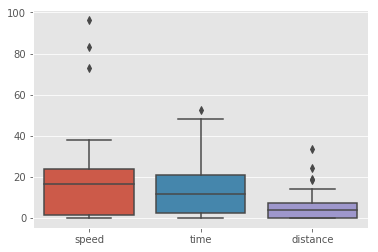

In [4]:
sns.boxplot(data=tracks[['speed','time','distance']]);

Trackspoints data set

In [5]:
print("Number of data records: ", len(trackspoints))
trackspoints.iloc[0:10]

Number of data records:  13560


,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


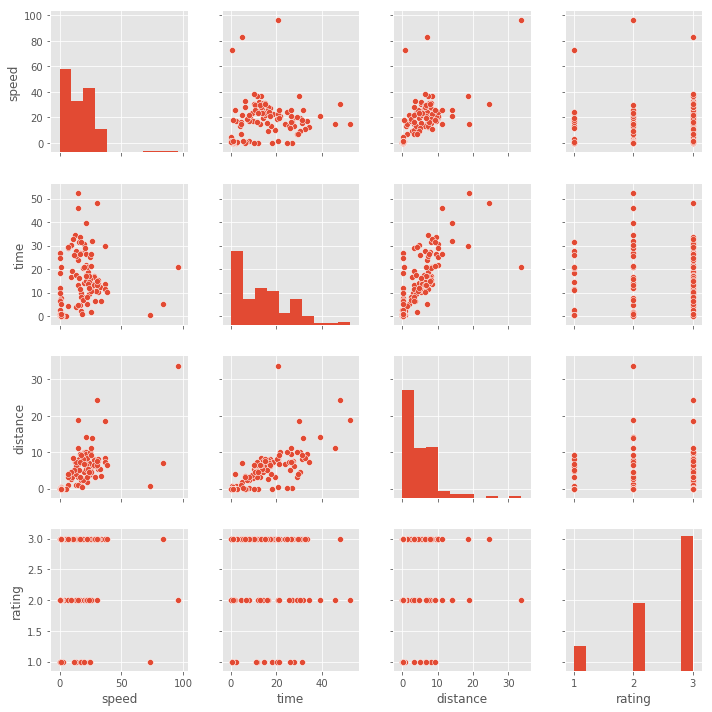

In [6]:
tracks_cor = tracks[['speed','time','distance','rating']]

sns.pairplot(tracks_cor)
plt.tight_layout()
plt.show();

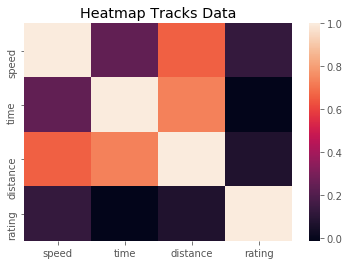

In [7]:
# Calculate correlations
corr = tracks[['speed','time','distance','rating']].corr()
# Heatmap
heatmap = sns.heatmap(corr);
heatmap.set_title("Heatmap Tracks Data");

**Observe the outliers:**

Outliers for speed > 50 $\frac{km}{h}$

In [8]:
tracks[tracks["speed"]>50]

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,linha,car_or_bus
30,51,2,72.926755,0.37,0.661,1,0,0,no_answer,0
32,55,1,83.328135,4.98,6.976,3,0,0,no_answer,1
33,58,6,96.206029,20.68,33.739,2,0,0,no_answer,0


Outliers for time > 40 minutes

In [9]:
tracks[tracks["time"]>40]

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,linha,car_or_bus
82,37962,12,14.712053,52.42,18.819,2,0,0,carro,1
97,38002,12,30.397045,47.93,24.461,3,0,0,carro,1
103,38017,16,14.630896,45.80,11.218,2,0,0,carro,1


Outliers for distance > 20 km

In [10]:
tracks[tracks["distance"]>20]

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,linha,car_or_bus
33,58,6,96.206029,20.68,33.739,2,0,0,no_answer,0
97,38002,12,30.397045,47.93,24.461,3,0,0,carro,1


**We have an unbalanced data set**

In [11]:
for rating in range(1,4):
    nr_of_rated_tracks = len(tracks[tracks["rating"]==rating])
    percentage = round(nr_of_rated_tracks/len(tracks) * 100)
    print("Number tracks with rating {}: {} thats {}% of observations".format(rating, nr_of_rated_tracks,
                                                                              percentage))

Number tracks with rating 1: 14 thats 11% of observations
Number tracks with rating 2: 38 thats 30% of observations
Number tracks with rating 3: 76 thats 59% of observations


There are much more observations with rating 3, than of the others, where rating is the subjective user rating of the traffic and 3=good, 2=normal, 1=bad.

----
## Feature Engineering

Construct weekday and daytime features by mapping the features to the unit circle. This captures the cyclicle nature of the weekday, hours and months variable. The idea is from a blog post on [kdnuggets](https://www.kdnuggets.com/2017/10/top-errors-novice-machine-learning-engineers.html?utm_content=buffer4acd4&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer)


In [12]:
from features.make_features import apply_feature_engineering

feature_engineered_tracks = apply_feature_engineering(tracks, trackspoints, keep_ids=True)

In [13]:
feature_engineered_tracks.head()

,id,id_android,speed,time,distance,rating,car_or_bus,month_sinus,month_cosinus,weekday_sinus,weekday_cosinus,daytime_start_sinus,daytime_start_cosinus,daytime_end_sinus,daytime_end_cosinus
0,1,0,0.201787,-0.460812,-0.383343,3,1,-0.866025,-0.5,-0.974928,-0.222521,0.933580,-0.358368,0.920508,-0.390723
1,2,0,0.960318,-0.295315,0.130600,3,1,-0.866025,-0.5,-0.974928,-0.222521,-0.410727,-0.911758,-0.453990,-0.891007
2,3,1,-0.166507,-0.831695,-0.721165,3,0,-0.866025,-0.5,0.974928,-0.222521,0.975342,0.220697,0.979047,0.203633
3,4,1,0.238032,1.144083,0.600122,3,0,-0.866025,-0.5,0.974928,-0.222521,0.975342,0.220697,0.994522,0.104528
4,8,0,0.631761,-1.015863,-0.121696,2,1,-0.866025,-0.5,-0.433884,-0.900969,-0.782603,-0.622521,-0.788016,-0.615655


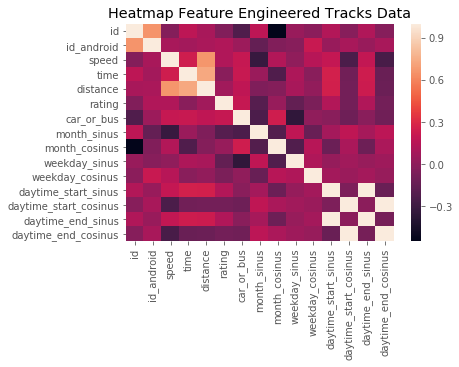

In [14]:
# Calculate correlations
corr = feature_engineered_tracks.corr()
# Heatmap
heatmap = sns.heatmap(corr);
heatmap.set_title("Heatmap Feature Engineered Tracks Data");

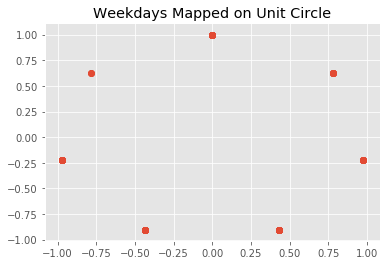

In [15]:
plt.title("Weekdays Mapped on Unit Circle")
plt.scatter(feature_engineered_tracks["weekday_sinus"],
            feature_engineered_tracks["weekday_cosinus"]);


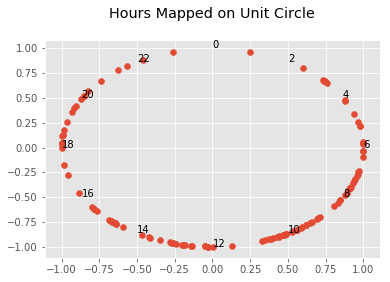

In [16]:
from features.make_features import map_to_sinus
from features.make_features import map_to_cosinus

fig, ax = plt.subplots()
ax.set_title("Hours Mapped on Unit Circle\n")

sinus_mapping = map_to_sinus(pd.DataFrame(np.arange(0,24),columns=["hours"]),"hours")
cosinus_mapping = map_to_cosinus(pd.DataFrame(np.arange(0,24),columns=["hours"]),"hours")

for i in range(0,24,2):
    ax.annotate(str(i),(sinus_mapping[i], cosinus_mapping[i]),
                xytext=(sinus_mapping[i], cosinus_mapping[i]))

ax.scatter(feature_engineered_tracks["daytime_start_sinus"],
           feature_engineered_tracks["daytime_start_cosinus"]);


**Calculate distribution of trips per year**

In [17]:
from utils.general_utils import get_starting_and_end_time_per_trip
starting_times_per_trip, _ = get_starting_and_end_time_per_trip(trackspoints)
print("Number of Trips 2014: ",len(starting_times_per_trip.set_index("trip_start")["2014"]))
print("Number of Trips 2015: ",len(starting_times_per_trip.set_index("trip_start")["2015"]))     
print("Number of Trips 2016: ",len(starting_times_per_trip.set_index("trip_start")["2016"])) 

Number of Trips 2014:  33
Number of Trips 2015:  93
Number of Trips 2016:  2


**Ratings per month**

In [18]:
from utils.general_utils import calculate_ratings_per_time_unit
ratings_per_month = calculate_ratings_per_time_unit(starting_times_per_trip["trip_start"],
                                      feature_engineered_tracks,
                                      time_unit="month")
ratings_per_month

,rating_1,rating_2,rating_3
time,,,
0,0,1,2
1,0,12,10
2,2,1,2
3,1,3,7
4,5,5,17
5,4,3,3
6,0,0,1
7,0,0,3
8,0,2,7


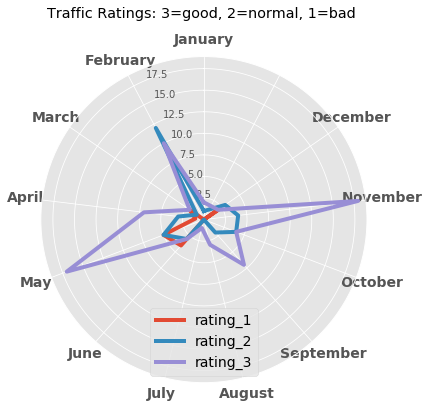

In [19]:
from visualization.visualize import plot_months_polar
plot_months_polar(ratings_per_month)

**Ratings per weekday**

In [20]:
ratings_per_weekday = calculate_ratings_per_time_unit(starting_times_per_trip["trip_start"],
                                      feature_engineered_tracks,
                                      time_unit="weekday")
ratings_per_weekday

,rating_1,rating_2,rating_3
time,,,
0,3,6,10
1,1,4,10
2,7,3,7
3,1,6,16
4,1,11,16
5,1,6,13
6,0,2,4


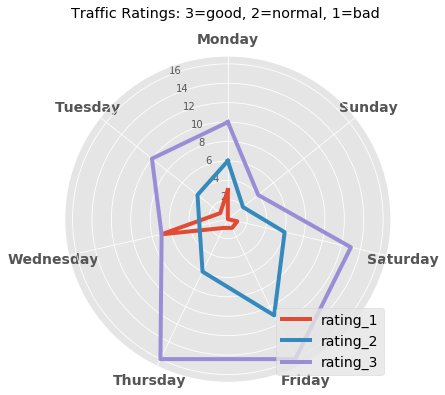

In [21]:
from visualization.visualize import plot_weekdays_polar
plot_weekdays_polar(ratings_per_weekday)

**Ratings per hour of the day**

In [22]:
from visualization.visualize import plot_daytime_polar
ratings_per_daytime = calculate_ratings_per_time_unit(starting_times_per_trip["trip_start"],
                                      feature_engineered_tracks,
                                      time_unit="daytime")
ratings_per_daytime

,rating_1,rating_2,rating_3
time,,,
0,0,0,1
2,0,0,1
3,0,1,4
4,1,2,0
5,0,2,4
6,1,0,4
7,0,4,9
8,0,3,2
9,1,3,8


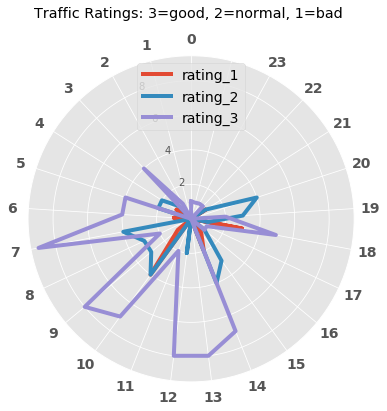

In [23]:
plot_daytime_polar(ratings_per_daytime)

----
### Apply feature engineering to trackspoints data

**Time Intervals per track**

Resample the trackspoints data set to new time intervals in minutes and summarize missing values with its nearest neighbour. This results in a sparse matrix, due to many zero values as the table is fitted to its longest trips.

In [24]:
from features.make_features import transform_trackspoints_to_track_per_time_interval

time_interval = 10
longest_trip_duration = 70
trackspoint_per_time = transform_trackspoints_to_track_per_time_interval(trackspoints,feature_engineered_tracks,
                                                                         time_interval,longest_trip_duration)
trackspoint_per_time.head(10)

,latitude_time_0,longitude_time_0,latitude_time_10,longitude_time_10,latitude_time_20,longitude_time_20,latitude_time_30,longitude_time_30,latitude_time_40,longitude_time_40,latitude_time_50,longitude_time_50,latitude_time_60,longitude_time_60,latitude_time_70,longitude_time_70,rating
track_id,,,,,,,,,,,,,,,,,
1,-10.939341,-37.062742,-10.947085,-37.045783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
2,-10.939439,-37.062428,-10.967642,-37.065284,-10.974962,-37.067889,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
3,-10.903162,-37.048294,-10.908875,-37.050502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
4,-10.908893,-37.052372,-10.918437,-37.054132,-10.918545,-37.065355,-10.922517,-37.094919,-10.924209,-37.104686,0.0,0.0,0.0,0.0,0.0,0.0,3
8,-10.943777,-37.052344,-10.946398,-37.051112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
10,-10.934852,-37.114376,-10.934906,-37.114360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
11,-10.904516,-37.060768,-10.910336,-37.066997,-10.907717,-37.073212,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
12,-10.905420,-37.048194,-10.908851,-37.051206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
13,-10.908859,-37.052239,-10.918329,-37.047899,-10.918581,-37.064142,-10.920134,-37.088294,-10.923761,-37.105065,0.0,0.0,0.0,0.0,0.0,0.0,3


**Time Intervals per quantile**

Split the trackspoints data set to a predefined number of quantiles and get each quantile point. This results in a dense representation and is independent of the length of a track.

In [25]:
# Only get quantiles of each trackspoints track to reduce dimensionality
from features.make_features import transform_trackspoints_to_track_per_quantile
number_of_quantiles = 5
trackspoint_per_quantile = transform_trackspoints_to_track_per_quantile(trackspoints, 
                                                                    feature_engineered_tracks,
                                                                    number_of_quantiles)


trackspoint_per_quantile.head(10)


,latitude_quantile_0,longitude_quantile_0,latitude_quantile_1,longitude_quantile_1,latitude_quantile_2,longitude_quantile_2,latitude_quantile_3,longitude_quantile_3,latitude_quantile_4,longitude_quantile_4,latitude_quantile_5,longitude_quantile_5
track_id,,,,,,,,,,,,
1,-10.939341,-37.062742,-10.941480,-37.057391,-10.943493,-37.053991,-10.941697,-37.050703,-10.943628,-37.047384,-10.947085,-37.045783
2,-10.939439,-37.062428,-10.942347,-37.060746,-10.951946,-37.067390,-10.967642,-37.065284,-10.972867,-37.067999,-10.974962,-37.067889
3,-10.903162,-37.048294,-10.906654,-37.048235,-10.907750,-37.048128,-10.908886,-37.049570,-10.908896,-37.049712,-10.908875,-37.050502
4,-10.908893,-37.052372,-10.918509,-37.054464,-10.918610,-37.063985,-10.918258,-37.073651,-10.919022,-37.085492,-10.924209,-37.104686
8,-10.943777,-37.052344,-10.943801,-37.052437,-10.943910,-37.052775,-10.943886,-37.052722,-10.944145,-37.051851,-10.946398,-37.051112
10,-10.934852,-37.114376,-10.934852,-37.114376,-10.934852,-37.114376,-10.934920,-37.114357,-10.934920,-37.114357,-10.934906,-37.114360
11,-10.904516,-37.060768,-10.910378,-37.064796,-10.910245,-37.068060,-10.907864,-37.073064,-10.907687,-37.073156,-10.907717,-37.073212
12,-10.905420,-37.048194,-10.907827,-37.048099,-10.908095,-37.048102,-10.908211,-37.048101,-10.908799,-37.048991,-10.908851,-37.051206
13,-10.908859,-37.052239,-10.914953,-37.048372,-10.918435,-37.054285,-10.918636,-37.065572,-10.918313,-37.075187,-10.923761,-37.105065


**Evaluate Discriminative Power of Features with Density Plots**

like [here](http://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation)

In order to use the model in real live situation where e.g. a user wants to know if a specific route is prone to traffic congestions, we are gonna drop the following features:
- speed = Average Speed on trip
- time = Duration of Trip
- Daytime_End = Hour of day at the end of trip

The remaining features will now be checked for their discriminative power in relation to the ratings.

In [26]:
random_state = 1
drop_columns = ["time","speed","daytime_end_sinus",
                "daytime_end_cosinus"]
features = feature_engineered_tracks.drop(drop_columns,axis=1)
print("Remaining Features: \n", [feature for feature in features.drop("rating",axis=1).columns.values])

Remaining Features: 
 ['id', 'id_android', 'distance', 'car_or_bus', 'month_sinus', 'month_cosinus', 'weekday_sinus', 'weekday_cosinus', 'daytime_start_sinus', 'daytime_start_cosinus']


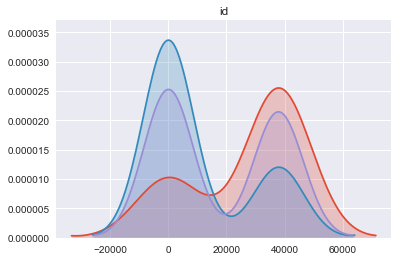

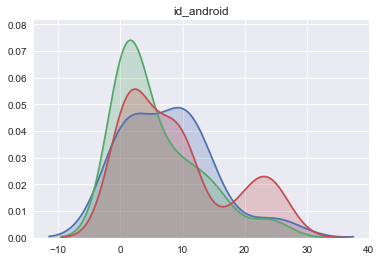

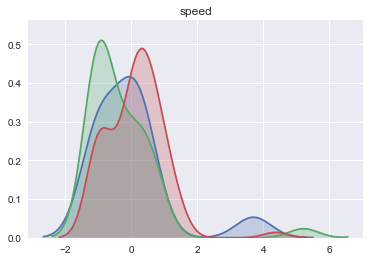

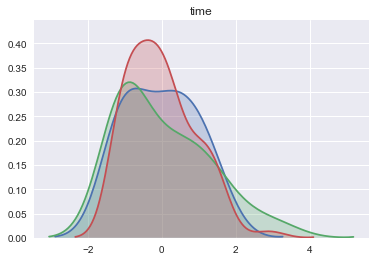

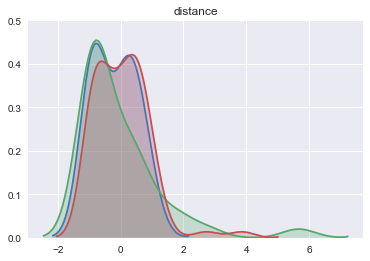

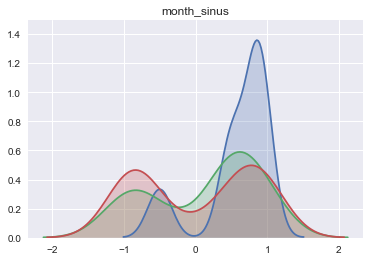

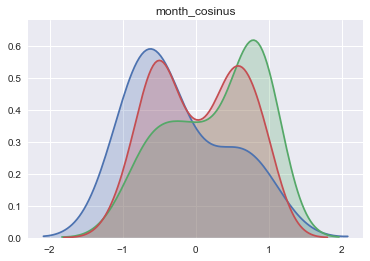

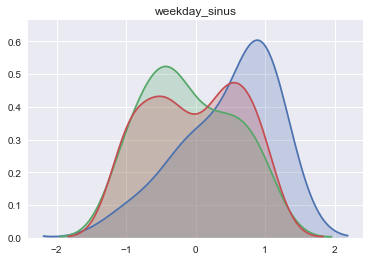

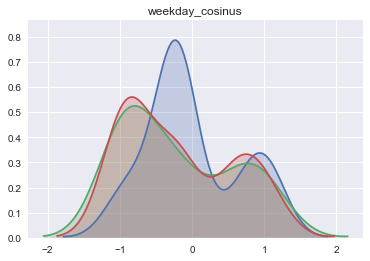

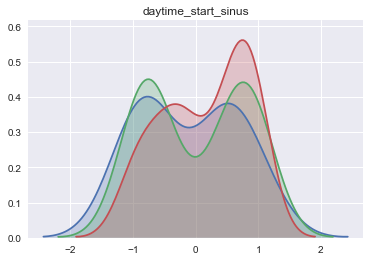

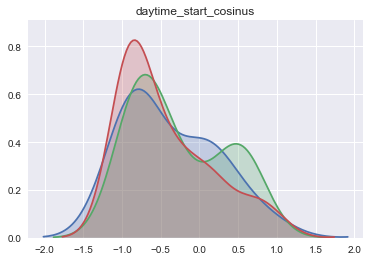

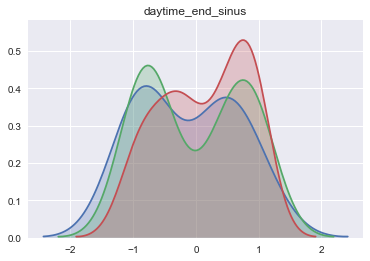

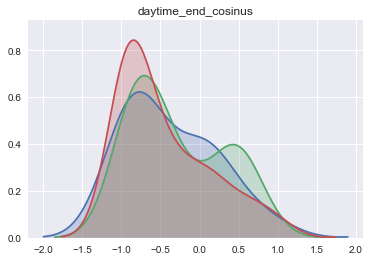

In [27]:
from visualization.visualize import create_density_plot_for_categorical_variable

features = list(feature_engineered_tracks.drop(["car_or_bus", "rating"], axis = 1).columns.values)

for feature in features:
    create_density_plot_for_categorical_variable(feature_engineered_tracks, feature, "rating")